In [75]:
from __future__ import print_function
from packaging.version import parse as Version
from platform import python_version

OK = '\x1b[42m[ OK ]\x1b[0m'
FAIL = "\x1b[41m[FAIL]\x1b[0m"

try:
    import importlib
except ImportError:
    print(FAIL, "Python version 3.11 is required,"
                " but %s is installed." % sys.version)

def import_version(pkg, min_ver, fail_msg=""):
    mod = None
    try:
        mod = importlib.import_module(pkg)
        if pkg in {'PIL'}:
            ver = mod.VERSION
        else:
            ver = mod.__version__
        if Version(ver) == Version(min_ver):
            print(OK, "%s version %s is installed."
                  % (lib, min_ver))
        else:
            print(FAIL, "%s version %s is required, but %s installed."
                  % (lib, min_ver, ver))    
    except ImportError:
        print(FAIL, '%s not installed. %s' % (pkg, fail_msg))
    return mod


# first check the python version
pyversion = Version(python_version())

if pyversion >= Version("3.11.4"):
    print(OK, "Python version is %s" % pyversion)
elif pyversion < Version("3.11"):
    print(FAIL, "Python version 3.11 is required,"
                " but %s is installed." % pyversion)
else:
    print(FAIL, "Unknown Python version: %s" % pyversion)

    
print()
requirements = {'numpy': "1.24.4", 'matplotlib': "3.7.2",'sklearn': "1.3.0", 
                'pandas': "2.0.3",'xgboost': "1.7.6", 'shap': "0.42.1", 'seaborn': "0.12.2"}

# now the dependencies
for lib, required_version in list(requirements.items()):
    import_version(lib, required_version)

[ OK ] Python version is 3.11.4

[ OK ] numpy version 1.24.4 is installed.
[ OK ] matplotlib version 3.7.2 is installed.
[ OK ] sklearn version 1.3.0 is installed.
[ OK ] pandas version 2.0.3 is installed.
[ OK ] xgboost version 1.7.6 is installed.
[ OK ] shap version 0.42.1 is installed.
[ OK ] seaborn version 0.12.2 is installed.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from scipy import stats
from scipy.stats import norm

df = pd.read_csv('data/LifeExpectancy.csv')

print(df.head())

   Country          Region  Year  Infant_deaths  Under_five_deaths  \
0  Turkiye     Middle East  2015           11.1               13.0   
1    Spain  European Union  2015            2.7                3.3   
2    India            Asia  2007           51.5               67.9   
3   Guyana   South America  2006           32.8               40.5   
4   Israel     Middle East  2012            3.4                4.3   

   Adult_mortality  Alcohol_consumption  Hepatitis_B  Measles   BMI  ...  \
0         105.8240                 1.32           97       65  27.8  ...   
1          57.9025                10.35           97       94  26.0  ...   
2         201.0765                 1.57           60       35  21.2  ...   
3         222.1965                 5.68           93       74  25.3  ...   
4          57.9510                 2.89           97       89  27.0  ...   

   Diphtheria  Incidents_HIV  GDP_per_capita  Population_mln  \
0          97           0.08           11006           78.

In [3]:
print(len(df.columns), 'columns')
print(len(df), 'rows')

21 columns
2864 rows


In [4]:
pd.set_option('display.width', 10)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2864 entries, 0 to 2863
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Country                      2864 non-null   object 
 1   Region                       2864 non-null   object 
 2   Year                         2864 non-null   int64  
 3   Infant_deaths                2864 non-null   float64
 4   Under_five_deaths            2864 non-null   float64
 5   Adult_mortality              2864 non-null   float64
 6   Alcohol_consumption          2864 non-null   float64
 7   Hepatitis_B                  2864 non-null   int64  
 8   Measles                      2864 non-null   int64  
 9   BMI                          2864 non-null   float64
 10  Polio                        2864 non-null   int64  
 11  Diphtheria                   2864 non-null   int64  
 12  Incidents_HIV                2864 non-null   float64
 13  GDP_per_capita    

In [5]:
df.isnull().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of       Country  \
0       False   
1       False   
2       False   
3       False   
4       False   
...       ...   
2859    False   
2860    False   
2861    False   
2862    False   
2863    False   

      Region  \
0      False   
1      False   
2      False   
3      False   
4      False   
...      ...   
2859   False   
2860   False   
2861   False   
2862   False   
2863   False   

       Year  \
0     False   
1     False   
2     False   
3     False   
4     False   
...     ...   
2859  False   
2860  False   
2861  False   
2862  False   
2863  False   

      Infant_deaths  \
0             False   
1             False   
2             False   
3             False   
4             False   
...             ...   
2859          False   
2860          False   
2861          False   
2862          False   
2863          False   

      Under_five_deaths  \
0                 False   
1                 False   
2

In [6]:

df['Economy_Status'] = df['Economy_status_Developed']
df.drop(['Economy_status_Developed', 'Economy_status_Developing'], axis=1, inplace=True)

In [7]:
df.isnull().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of       Country  \
0       False   
1       False   
2       False   
3       False   
4       False   
...       ...   
2859    False   
2860    False   
2861    False   
2862    False   
2863    False   

      Region  \
0      False   
1      False   
2      False   
3      False   
4      False   
...      ...   
2859   False   
2860   False   
2861   False   
2862   False   
2863   False   

       Year  \
0     False   
1     False   
2     False   
3     False   
4     False   
...     ...   
2859  False   
2860  False   
2861  False   
2862  False   
2863  False   

      Infant_deaths  \
0             False   
1             False   
2             False   
3             False   
4             False   
...             ...   
2859          False   
2860          False   
2861          False   
2862          False   
2863          False   

      Under_five_deaths  \
0                 False   
1                 False   
2

In [8]:
df = df.sort_values(by='Year')
df.head(15)

Country  \
803                     Fiji   
2690                   Qatar   
1527                    Chad   
2777            Turkmenistan   
2601                 Algeria   
2604               Australia   
2100                   Nepal   
2316  Bosnia and Herzegovina   
2607                Paraguay   
1826           Guinea-Bissau   
1940        Papua New Guinea   
951                  Ukraine   
2093                Thailand   
953                  Germany   
261                  Liberia   

              Region  \
803          Oceania   
2690     Middle East   
1527          Africa   
2777            Asia   
2601          Africa   
2604         Oceania   
2100            Asia   
2316  Rest of Europe   
2607   South America   
1826          Africa   
1940         Oceania   
951   Rest of Europe   
2093            Asia   
953   European Union   
261           Africa   

      Year  \
803   2000   
2690  2000   
1527  2000   
2777  2000   
2601  2000   
2604  2000   
2100  2000   
2316  2000   
2607  2000   
1826  2000   
1940  2000   
951   2000   
2093  2000   
953   2000   
261   2000   

      Infant_deaths  \
803            19.1   
2690           10.7   
1527           99.7   
2777           57.5   
2601           33.9   
2604            5.1   
2100           58.7   
2316            8.7   
2607           27.9   
1826          105.0   
1940           53.6   
951            15.7   
2093           18.7   
953             4.4   
261           127.9   

      Under_five_deaths  \
803                22.4   
2690               12.5   
1527              184.0   
2777               69.7   
2601               39.7   
2604                6.2   
2100               79.1   
2316                9.9   
2607               33.9   
1826              173.8   
1940               71.1   
951                18.3   
2093               22.0   
953                 5.4   
261               189.7   

      Adult_mortality  \
803          219.3440   
2690          71.2010   
1527         406.9915   
2777         235.6970   
2601         140.4860   
2604          77.0385   
2100         237.2425   
2316         121.2340   
2607         169.3860   
1826         304.3710   
1940         274.1065   
951          256.5475   
2093         197.3920   
953           94.4050   
261          316.5890   

      Alcohol_consumption  \
803                 2.460   
2690                0.550   
1527                0.300   
2777                2.890   
2601                0.250   
2604               10.170   
2100                0.084   
2316                3.870   
2607                5.640   
1826                3.020   
1940                0.670   
951                 6.950   
2093                5.810   
953                12.910   
261                 4.470   

      Hepatitis_B  \
803            98   
2690           89   
1527           27   
2777           96   
2601           81   
2604           95   
2100           46   
2316           92   
2607           89   
1826           83   
1940           57   
951            66   
2093           95   
953            84   
261            58   

      Measles  \
803        84   
2690       91   
1527       64   
2777       92   
2601       78   
2604       85   
2100       65   
2316       74   
2607       55   
1826       64   
1940       65   
951        99   
2093       99   
953        81   
261        64   

       BMI  \
803   26.3   
2690  27.6   
1527  20.9   
2777  24.7   
2601  24.3   
2604  26.2   
2100  20.7   
2316  24.8   
2607  24.9   
1826  22.1   
1940  24.1   
951   25.7   
2093  22.9   
953   25.8   
261   23.0   

      Polio  \
803      91   
2690     91   
1527     30   
2777     98   
2601     86   
2604     90   
2100     74   
2316     87   
2607     86   
1826     52   
1940     51   
951      99   
2093     97   
953      94   
261      56   

      Diphtheria  \
803           90   
2690          80   
1527          36   
2777          97   
2601          86   
2604          90   
2100          

In [9]:
df.describe()

Year  \
count  2864.000000   
mean   2007.500000   
std       4.610577   
min    2000.000000   
25%    2003.750000   
50%    2007.500000   
75%    2011.250000   
max    2015.000000   

       Infant_deaths  \
count    2864.000000   
mean       30.363792   
std        27.538117   
min         1.800000   
25%         8.100000   
50%        19.600000   
75%        47.350000   
max       138.100000   

       Under_five_deaths  \
count        2864.000000   
mean           42.938268   
std            44.569974   
min             2.300000   
25%             9.675000   
50%            23.100000   
75%            66.000000   
max           224.900000   

       Adult_mortality  \
count      2864.000000   
mean        192.251775   
std         114.910281   
min          49.384000   
25%         106.910250   
50%         163.841500   
75%         246.791375   
max         719.360500   

       Alcohol_consumption  \
count          2864.000000   
mean              4.820882   
std               3.981949   
min               0.000000   
25%               1.200000   
50%               4.020000   
75%               7.777500   
max              17.870000   

       Hepatitis_B  \
count  2864.000000   
mean     84.292598   
std      15.995511   
min      12.000000   
25%      78.000000   
50%      89.000000   
75%      96.000000   
max      99.000000   

           Measles  \
count  2864.000000   
mean     77.344972   
std      18.659693   
min      10.000000   
25%      64.000000   
50%      83.000000   
75%      93.000000   
max      99.000000   

               BMI  \
count  2864.000000   
mean     25.032926   
std       2.193905   
min      19.800000   
25%      23.200000   
50%      25.500000   
75%      26.400000   
max      32.100000   

             Polio  \
count  2864.000000   
mean     86.499651   
std      15.080365   
min       8.000000   
25%      81.000000   
50%      93.000000   
75%      97.000000   
max      99.000000   

        Diphtheria  \
count  2864.000000   
mean     86.271648   
std      15.534225   
min      16.000000   
25%      81.000000   
50%      93.000000   
75%      97.000000   
max      99.000000   

       Incidents_HIV  \
count    2864.000000   
mean        0.894288   
std         2.381389   
min         0.010000   
25%         0.080000   
50%         0.150000   
75%         0.460000   
max        21.680000   

       GDP_per_capita  \
count     2864.000000   
mean     11540.924930   
std      16934.788931   
min        148.000000   
25%       1415.750000   
50%       4217.000000   
75%      12557.000000   
max     112418.000000   

       Population_mln  \
count     2864.000000   
mean        36.675915   
std        136.485867   
min          0.080000   
25%          2.097500   
50%          7.850000   
75%         23.687500   
max       1379.860000   

       Thinness_ten_nineteen_years  \
count                  2864.000000   
mean                      4.865852   
std                       4.438234   
min                       0.100000   
25%                       1.600000   
50%                       3.300000   
75%                       7.200000   
max                      27.700000   

       Thinness_five_nine_years  \
count               2864.000000   
mean                   4.899825   
std                    4.525217   
min                    0.100000   
25%                    1.600000   
50%                    3.400000   
75%                    7.300000   
max                   28.600000   

         Schooling  \
count  2864.000000   
mean      7.632123   
std       3.171556   
min       1.100000   
25%       5.100000   
50%       7.800000   
75%      10.300000   
max      14.100000   

       Life_expectancy  \
count      2864.000000   
mean         68.856075   
std           9.405608   
min          39.400000   
25%          62.700000   
50%          71.400000   
75%          75.400000   
max          83.800000   

       Economy_Status  
count     2864.000000  
mean         0.206704  
std       

In [10]:
df[['Country', 'Year', 'Economy_Status', 'Region']].nunique()

Country           179
Year               16
Economy_Status      2
Region              9
dtype: int64

In [11]:
df.groupby('Economy_Status')['Country'].nunique().reset_index()

Economy_Status  \
0               0   
1               1   

   Country  
0      142  
1       37

In [12]:
df.groupby('Region')['Country'].nunique().reset_index()

Region  \
0                         Africa   
1                           Asia   
2  Central America and Caribbean   
3                 European Union   
4                    Middle East   
5                  North America   
6                        Oceania   
7                 Rest of Europe   
8                  South America   

   Country  
0       51  
1       27  
2       19  
3       27  
4       14  
5        3  
6       11  
7       15  
8       12

In [13]:
df.groupby(['Region', 'Economy_Status'])['Country'].nunique().reset_index()

Region  \
0                          Africa   
1                            Asia   
2                            Asia   
3   Central America and Caribbean   
4                  European Union   
5                     Middle East   
6                     Middle East   
7                   North America   
8                   North America   
9                         Oceania   
10                        Oceania   
11                 Rest of Europe   
12                 Rest of Europe   
13                  South America   

    Economy_Status  \
0                0   
1                0   
2                1   
3                0   
4                1   
5                0   
6                1   
7                0   
8                1   
9                0   
10               1   
11               0   
12               1   
13               0   

    Country  
0        51  
1        26  
2         1  
3        19  
4        27  
5        13  
6         1  
7         1  
8         2  
9         9  
10        2  
11       11  
12        4  
13       12

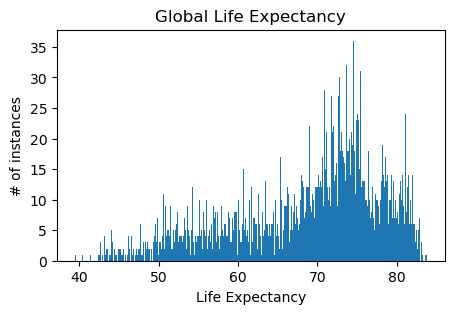

In [14]:
plt.figure(figsize=(5,3))

df['Life_expectancy'].plot.hist(bins = df['Life_expectancy'].nunique())   # bins = int(np.sqrt(df.shape[0])) 
                        # bins = df['age'].nunique()
plt.xlabel('Life Expectancy')
plt.ylabel('# of instances')
plt.title('Global Life Expectancy')
plt.show()

In [15]:
df['Life_expectancy_next_year'] = df.groupby('Country')['Life_expectancy'].shift(-1)
df.drop('Life_expectancy', axis=1, inplace=True)
df = df.dropna(subset=['Life_expectancy_next_year'])

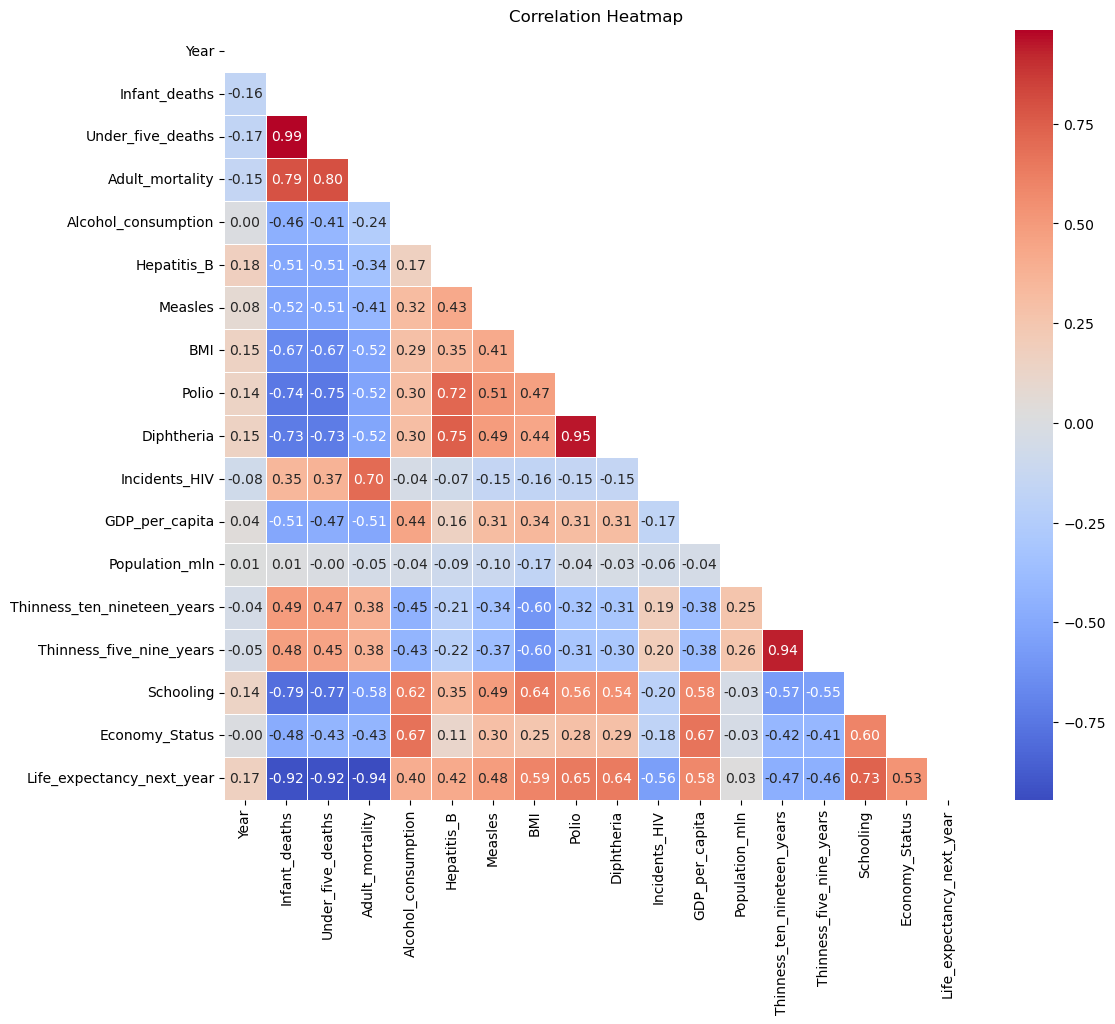

In [16]:
selected_columns = [
    
    'Year',
    'Infant_deaths',
    'Under_five_deaths',
    'Adult_mortality',
    'Alcohol_consumption',
    'Hepatitis_B',
    'Measles',
    'BMI',
    'Polio',
    'Diphtheria',
    'Incidents_HIV',
    'GDP_per_capita',
    'Population_mln',
    'Thinness_ten_nineteen_years',
    'Thinness_five_nine_years',
    'Schooling',
    'Economy_Status',
    'Life_expectancy_next_year'
]


correlation_matrix = df[selected_columns].corr()


mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))


plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, mask=mask)
plt.title('Correlation Heatmap')
plt.savefig("Correlation Heatmap", dpi=300)
plt.show()

In [17]:
count_developed_0 = len(df[df['Economy_Status'] == 0])
print("Number of Developing Countries:", count_developed_0)

Number of Developing Countries: 2130


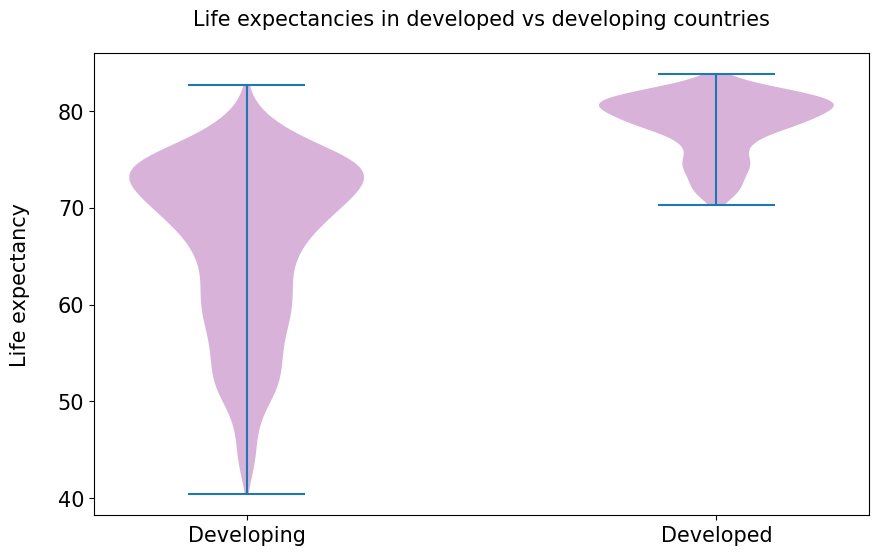

In [18]:
dataset = [df[df['Economy_Status']==0]['Life_expectancy_next_year'].values,
           df[df['Economy_Status']==1]['Life_expectancy_next_year'].values]

plt.figure(figsize=(10,6))

violins = plt.violinplot(dataset)
for body in violins['bodies']:
    body.set_facecolor('purple')
plt.xticks([1,2],['Developing','Developed'])
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel('Life expectancy', fontsize=15, labelpad=20)
plt.title('Life expectancies in developed vs developing countries', fontsize = 15, pad=20)
plt.savefig('Life expectancies in developed vs developing countries', dpi=300)

plt.show()

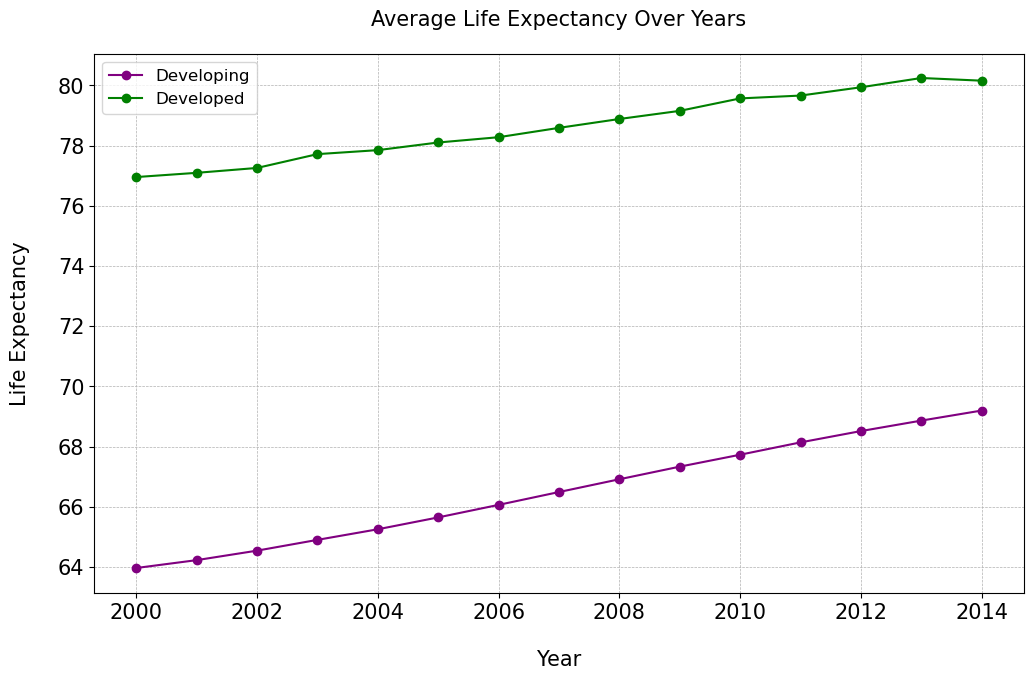

In [19]:
grouped = df.groupby(['Year', 'Economy_Status'])['Life_expectancy_next_year'].mean().unstack()


plt.figure(figsize=(12, 7))
grouped.plot(ax=plt.gca(), color=['purple', 'green'], marker='o')

plt.title('Average Life Expectancy Over Years', fontsize=15, pad=20)
plt.ylabel('Life Expectancy', fontsize=15, labelpad=20)
plt.xlabel('Year', fontsize=15, labelpad=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(["Developing", "Developed"], fontsize=12)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.savefig('Average Life Expectancy Over Years', dpi=300)


plt.show()

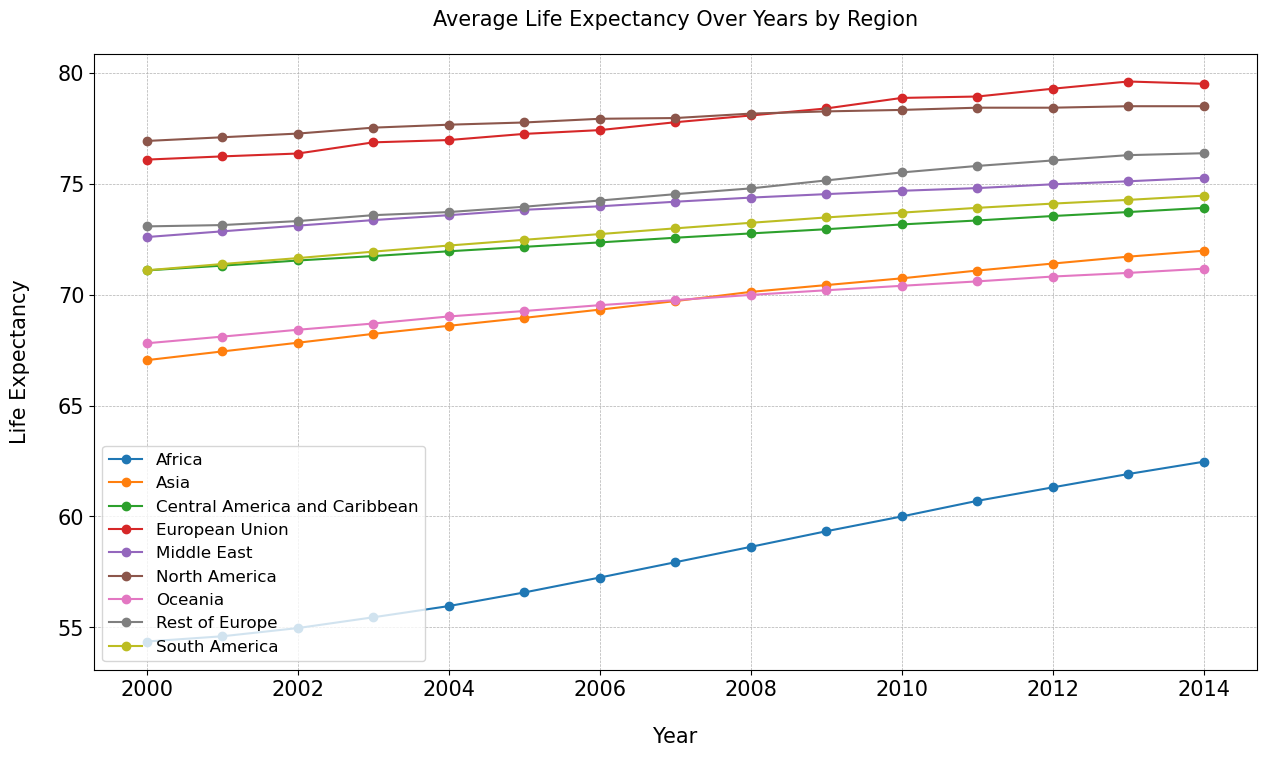

In [20]:
grouped = df.groupby(['Year', 'Region'])['Life_expectancy_next_year'].mean().unstack()


plt.figure(figsize=(15, 8))
grouped.plot(ax=plt.gca(), marker='o')

plt.title('Average Life Expectancy Over Years by Region', fontsize=15, pad=20)
plt.ylabel('Life Expectancy', fontsize=15, labelpad=20)
plt.xlabel('Year', fontsize=15, labelpad=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(fontsize=12)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.savefig('Average Life Expectancy Over Years by Region', dpi=300)
plt.show()

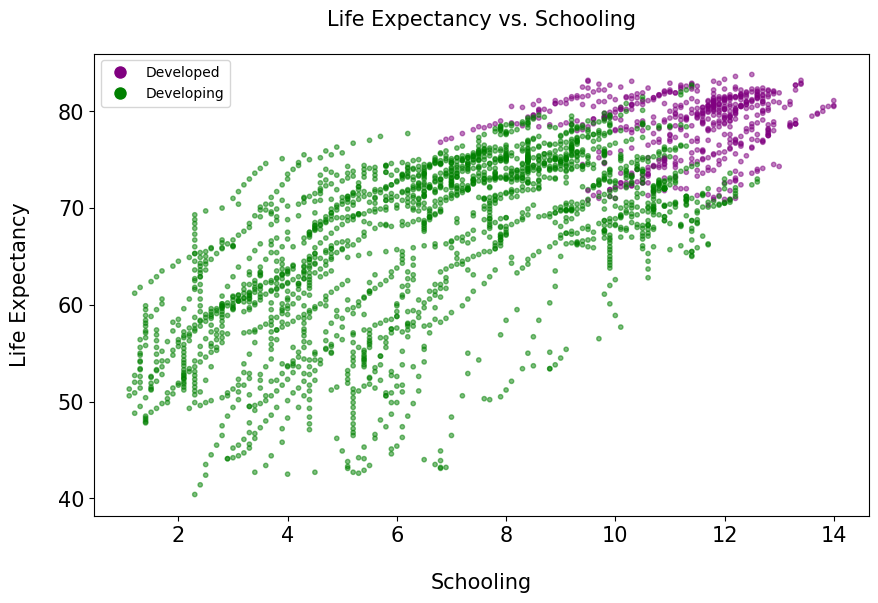

<Figure size 640x480 with 0 Axes>

In [21]:

colors = df['Economy_Status'].map({0: 'green', 1: 'purple'})

df.plot.scatter('Schooling', 'Life_expectancy_next_year', figsize=(10, 6), alpha=0.5, s=10, c=colors)
plt.title('Life Expectancy vs. Schooling', fontsize=15, pad=20)
plt.ylabel('Life Expectancy', fontsize=15, labelpad=20)
plt.xlabel('Schooling', fontsize=15, labelpad=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)


from matplotlib.lines import Line2D
legend_elements = [Line2D([0], [0], marker='o', color='w', label='Developed', markersize=10, markerfacecolor='purple'),
                   Line2D([0], [0], marker='o', color='w', label='Developing', markersize=10, markerfacecolor='green')]
plt.legend(handles=legend_elements, loc='upper left')

plt.show()
plt.savefig("life expectancy vs schooling", dpi=300)

#Schooling is average years that people aged 25+ spent in formal education

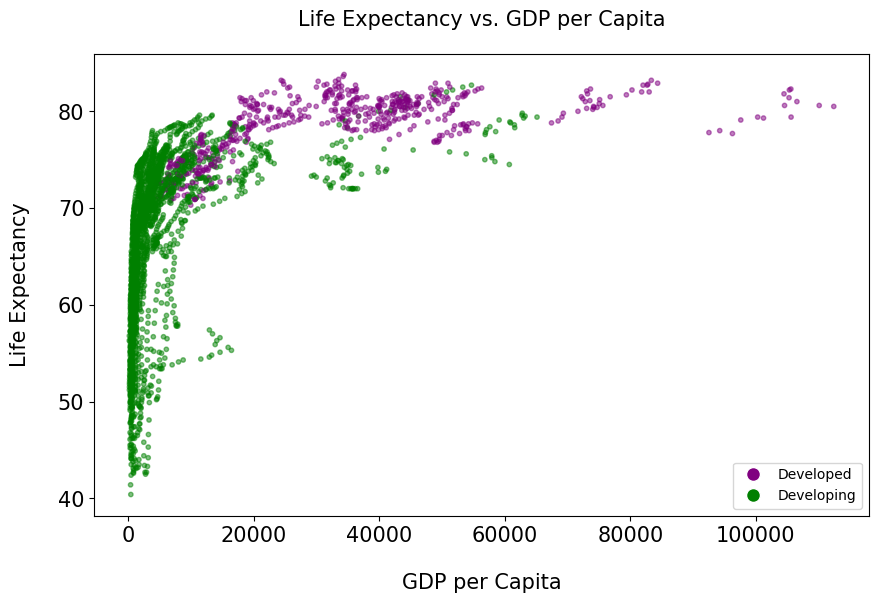

In [22]:
colors = df['Economy_Status'].map({0: 'green', 1: 'purple'})

df.plot.scatter('GDP_per_capita', 'Life_expectancy_next_year', figsize=(10, 6), alpha=0.5, s=10, c=colors)
plt.title('Life Expectancy vs. GDP per Capita', fontsize=15, pad=20)
plt.ylabel('Life Expectancy', fontsize=15, labelpad=20)
plt.xlabel('GDP per Capita', fontsize=15, labelpad=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)


from matplotlib.lines import Line2D
legend_elements = [Line2D([0], [0], marker='o', color='w', label='Developed', markersize=10, markerfacecolor='purple'),
                   Line2D([0], [0], marker='o', color='w', label='Developing', markersize=10, markerfacecolor='green')]
plt.legend(handles=legend_elements, loc='lower right')
plt.savefig('Average Life Expectancy vs GDP per Capita', dpi=300)

plt.show()


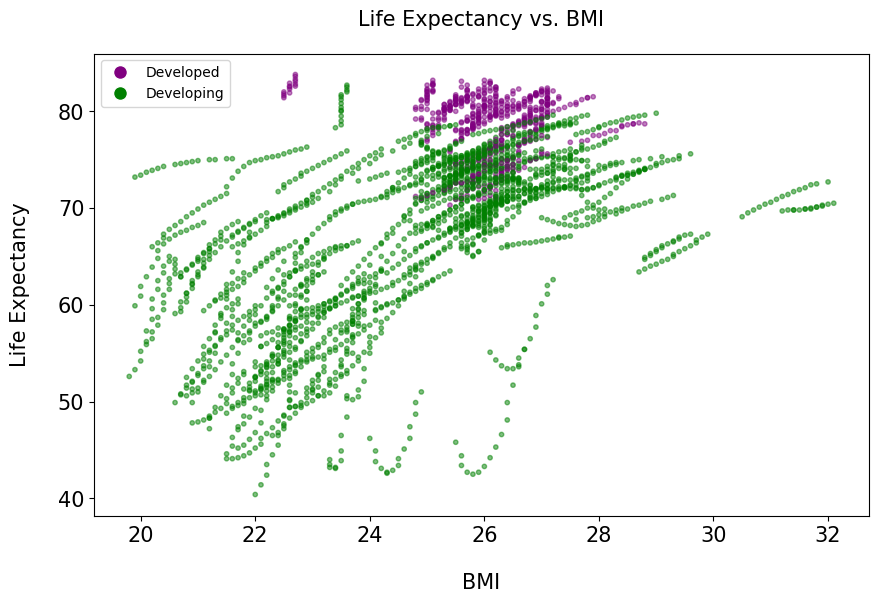

In [23]:
colors = df['Economy_Status'].map({0: 'green', 1: 'purple'})

df.plot.scatter('BMI', 'Life_expectancy_next_year', figsize=(10, 6), alpha=0.5, s=10, c=colors)
plt.title('Life Expectancy vs. BMI', fontsize=15, pad=20)
plt.ylabel('Life Expectancy', fontsize=15, labelpad=20)
plt.xlabel('BMI', fontsize=15, labelpad=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)


from matplotlib.lines import Line2D
legend_elements = [Line2D([0], [0], marker='o', color='w', label='Developed', markersize=10, markerfacecolor='purple'),
                   Line2D([0], [0], marker='o', color='w', label='Developing', markersize=10, markerfacecolor='green')]
plt.legend(handles=legend_elements, loc='upper left')
plt.savefig('Life Expectancy vs BMI', dpi=300)

plt.show()

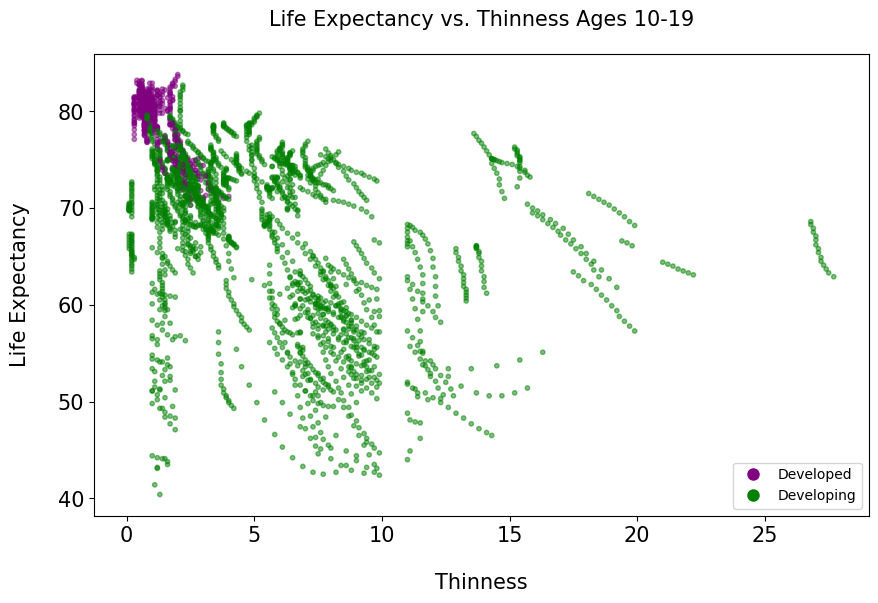

In [24]:
colors = df['Economy_Status'].map({0: 'green', 1: 'purple'})

df.plot.scatter('Thinness_ten_nineteen_years', 'Life_expectancy_next_year', figsize=(10, 6), alpha=0.5, s=10, c=colors)
plt.title('Life Expectancy vs. Thinness Ages 10-19', fontsize=15, pad=20)
plt.ylabel('Life Expectancy', fontsize=15, labelpad=20)
plt.xlabel('Thinness', fontsize=15, labelpad=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)


from matplotlib.lines import Line2D
legend_elements = [Line2D([0], [0], marker='o', color='w', label='Developed', markersize=10, markerfacecolor='purple'),
                   Line2D([0], [0], marker='o', color='w', label='Developing', markersize=10, markerfacecolor='green')]
plt.legend(handles=legend_elements, loc='lower right')

plt.show()

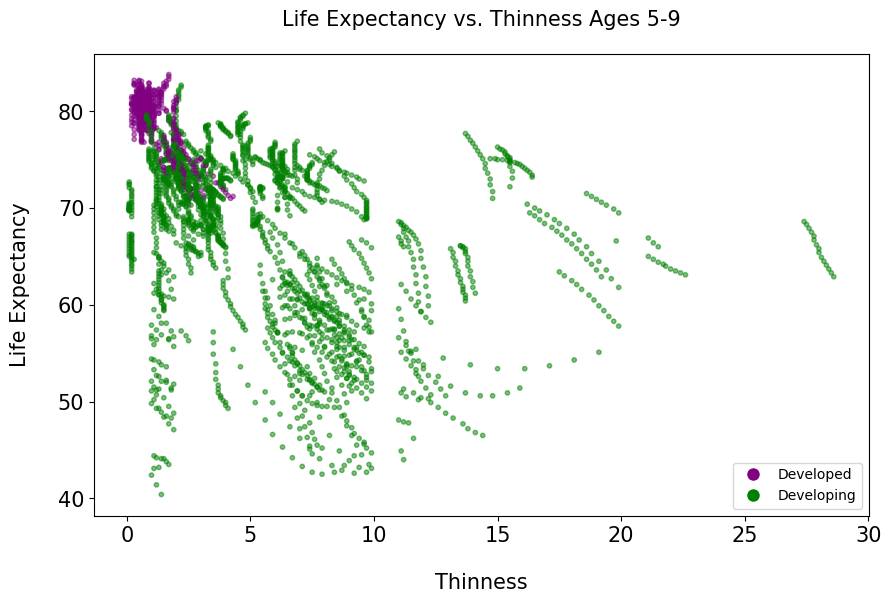

In [25]:
colors = df['Economy_Status'].map({0: 'green', 1: 'purple'})

df.plot.scatter('Thinness_five_nine_years', 'Life_expectancy_next_year', figsize=(10, 6), alpha=0.5, s=10, c=colors)
plt.title('Life Expectancy vs. Thinness Ages 5-9', fontsize=15, pad=20)
plt.ylabel('Life Expectancy', fontsize=15, labelpad=20)
plt.xlabel('Thinness', fontsize=15, labelpad=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)


from matplotlib.lines import Line2D
legend_elements = [Line2D([0], [0], marker='o', color='w', label='Developed', markersize=10, markerfacecolor='purple'),
                   Line2D([0], [0], marker='o', color='w', label='Developing', markersize=10, markerfacecolor='green')]
plt.legend(handles=legend_elements, loc='lower right')

plt.show()

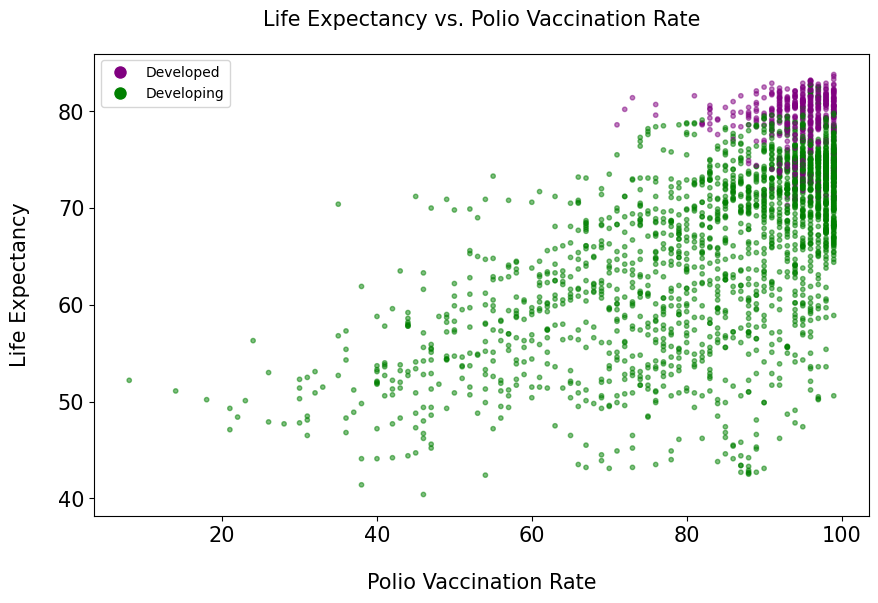

In [26]:
colors = df['Economy_Status'].map({0: 'green', 1: 'purple'})

df.plot.scatter('Polio', 'Life_expectancy_next_year', figsize=(10, 6), alpha=0.5, s=10, c=colors)
plt.title('Life Expectancy vs. Polio Vaccination Rate', fontsize=15, pad=20)
plt.ylabel('Life Expectancy', fontsize=15, labelpad=20)
plt.xlabel('Polio Vaccination Rate', fontsize=15, labelpad=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)


from matplotlib.lines import Line2D
legend_elements = [Line2D([0], [0], marker='o', color='w', label='Developed', markersize=10, markerfacecolor='purple'),
                   Line2D([0], [0], marker='o', color='w', label='Developing', markersize=10, markerfacecolor='green')]
plt.legend(handles=legend_elements, loc='upper left')

plt.show()
#Polio is measure of polio immunization

In [27]:
developing_countries = df[df['Economy_Status'] == 0]


grouped = developing_countries.groupby('Country')['Life_expectancy_next_year'].max().reset_index()


sorted_countries = grouped.sort_values(by='Life_expectancy_next_year', ascending=False)


N = 10
top_countries = sorted_countries.head(N)

print(top_countries)

        Country  \
112   Singapore   
102       Qatar   
34   Costa Rica   
28        Chile   
11     Barbados   
70      Lebanon   
36         Cuba   
1       Albania   
97       Panama   
77     Maldives   

     Life_expectancy_next_year  
112                       82.7  
102                       79.8  
34                        79.6  
28                        79.6  
11                        78.8  
70                        78.8  
36                        78.6  
1                         78.0  
97                        77.8  
77                        77.7  


In [28]:
developed_countries = df[df['Economy_Status'] == 1]


grouped = developed_countries.groupby('Country')['Life_expectancy_next_year'].min().reset_index()


sorted_countries = grouped.sort_values(by='Life_expectancy_next_year', ascending=True)

N = 10
bottom_countries = sorted_countries.head(N)

print(bottom_countries)

            Country  \
9           Estonia   
20           Latvia   
21        Lithuania   
29          Romania   
3          Bulgaria   
14          Hungary   
30  Slovak Republic   
27           Poland   
5           Croatia   
7           Czechia   

    Life_expectancy_next_year  
9                        70.3  
20                       70.8  
21                       70.9  
29                       71.0  
3                        71.8  
14                       72.2  
30                       73.4  
27                       74.2  
5                        74.5  
7                        75.2  


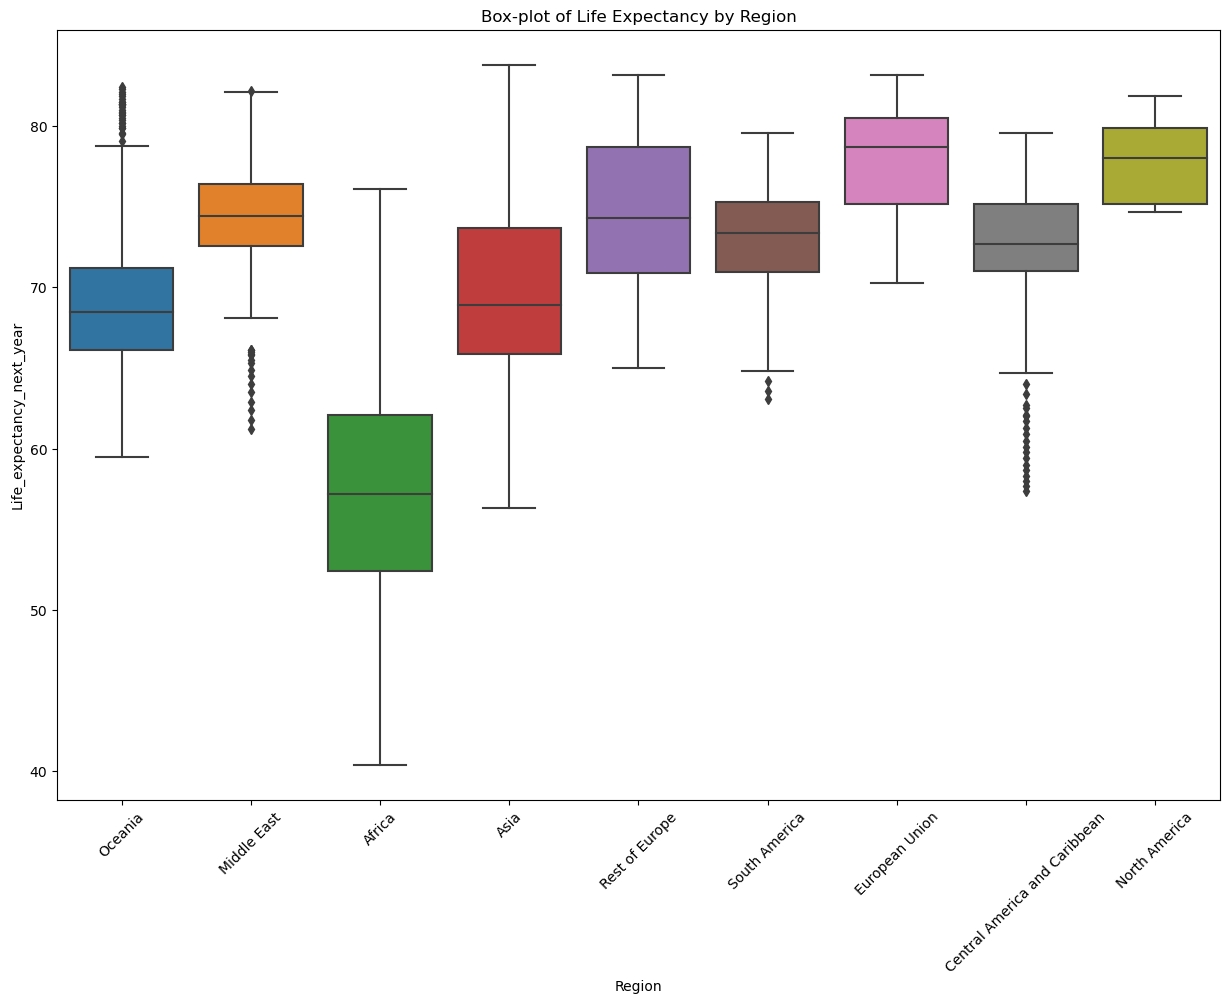

In [29]:
import seaborn as sns

df = df.dropna(subset=['Life_expectancy_next_year'])


plt.figure(figsize=(15,10))
sns.boxplot(x='Region', y='Life_expectancy_next_year', data=df)
plt.title("Box-plot of Life Expectancy by Region")
plt.xticks(rotation=45)
plt.show()

In [30]:
lowest_life_expectancy_index = df['Life_expectancy_next_year'].idxmin()


row_with_lowest_life_expectancy = df.loc[lowest_life_expectancy_index]


print("Row with the Lowest Life Expectancy:")
print(row_with_lowest_life_expectancy)

Row with the Lowest Life Expectancy:
Country                        Sierra Leone
Region                               Africa
Year                                   2000
Infant_deaths                         138.1
Under_five_deaths                     224.9
Adult_mortality                    531.3245
Alcohol_consumption                    3.75
Hepatitis_B                              71
Measles                                  60
BMI                                    22.0
Polio                                    46
Diphtheria                               44
Incidents_HIV                          1.59
GDP_per_capita                          403
Population_mln                         4.58
Thinness_ten_nineteen_years             1.3
Thinness_five_nine_years                1.4
Schooling                               2.3
Economy_Status                            0
Life_expectancy_next_year              40.4
Name: 1417, dtype: object


In [31]:
highest_life_expectancy_index = df['Life_expectancy_next_year'].idxmax()


row_with_highest_life_expectancy = df.loc[highest_life_expectancy_index]


print("Row with the Highest Life Expectancy:")
print(row_with_highest_life_expectancy)

Row with the Highest Life Expectancy:
Country                         Japan
Region                           Asia
Year                             2014
Infant_deaths                     2.1
Under_five_deaths                 2.8
Adult_mortality                55.582
Alcohol_consumption               8.4
Hepatitis_B                        83
Measles                            94
BMI                              22.7
Polio                              99
Diphtheria                         96
Incidents_HIV                    0.17
GDP_per_capita                  34387
Population_mln                 127.28
Thinness_ten_nineteen_years       2.0
Thinness_five_nine_years          1.7
Schooling                        12.5
Economy_Status                      1
Life_expectancy_next_year        83.8
Name: 2856, dtype: object


In [32]:
from sklearn.metrics import mean_squared_error
df_baseline = df[['Country', 'Year', 'Life_expectancy_next_year']].copy()

df_train_baseline = df_baseline[df_baseline['Year'] <= 2011]
df_test_baseline = df_baseline[df_baseline['Year'] > 2011]

last_observation_per_country = df_train_baseline.groupby('Country')['Life_expectancy_next_year'].last()
y_pred_baseline_per_country = df_test_baseline['Country'].map(last_observation_per_country)

global_life_expectancy = df_train_baseline['Life_expectancy_next_year'].median()
y_pred_baseline_per_country.fillna(global_life_expectancy, inplace=True)

rmse_baseline_per_country = np.sqrt(mean_squared_error(df_test_baseline['Life_expectancy_next_year'], y_pred_baseline_per_country))

print(f"Baseline RMSE using Last Observation per Country: {rmse_baseline_per_country}")


Baseline RMSE using Last Observation per Country: 0.9518383663234077


print(train_data.shape)
print(val_data.shape)
print(test_data.shape)

print(train_data['Year'].head(5))
print(val_data['Year'].head(5))
print(test_data['Year'].head(5))

In [33]:

from sklearn.preprocessing import OneHotEncoder, StandardScaler

continuous_features = ['Infant_deaths', 'Under_five_deaths', 'Adult_mortality', 'Alcohol_consumption', 'Hepatitis_B', 
                       'Measles', 'BMI', 'Polio', 'Diphtheria', 'Incidents_HIV', 'GDP_per_capita', 'Population_mln', 
                       'Thinness_ten_nineteen_years', 'Thinness_five_nine_years', 'Schooling']
categorical_features = ['Country', 'Region']

train_data = df[df['Year'] <= 2011]
val_data = df[(df['Year'] >= 2012) & (df['Year'] <= 2013)]
test_data = df[df['Year'] >= 2014]

def remove_highly_correlated_features(df, features, threshold=0.9):

    corr_matrix = df[features].corr().abs()

    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

    to_drop = [column for column in upper.columns if any(upper[column] > threshold)]
    
    df_reduced = df.drop(columns=to_drop)
    return df_reduced, to_drop

X_train_reduced, features_to_drop = remove_highly_correlated_features(train_data, continuous_features, threshold=0.9)

continuous_features = [feature for feature in continuous_features if feature not in features_to_drop]

X_val_reduced = val_data.drop(columns=features_to_drop, axis=1)
X_test_reduced = test_data.drop(columns=features_to_drop, axis=1)

encoder = OneHotEncoder(drop='first', sparse_output=False)
scaler = StandardScaler()

def preprocess_data(data, encoder, scaler, continuous_features, categorical_features, is_train=False):
    y = data['Life_expectancy_next_year']
    X = data.drop(columns=['Life_expectancy_next_year'] + categorical_features, axis=1)

    if is_train:
        X[continuous_features] = scaler.fit_transform(X[continuous_features])
    else:
        X[continuous_features] = scaler.transform(X[continuous_features])

    if is_train:
        encoded = encoder.fit_transform(data[categorical_features])
    else:
        encoded = encoder.transform(data[categorical_features])
    encoded_df = pd.DataFrame(encoded, columns=encoder.get_feature_names_out(categorical_features))

    X = pd.concat([X.reset_index(drop=True), encoded_df], axis=1)

    return X, y

X_train, y_train = preprocess_data(X_train_reduced, encoder, scaler, continuous_features, categorical_features, is_train=True)
X_val, y_val = preprocess_data(X_val_reduced, encoder, scaler, continuous_features, categorical_features)
X_test, y_test = preprocess_data(X_test_reduced, encoder, scaler, continuous_features, categorical_features)

print("Shape of X_train after preprocessing:", X_train.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of X_val after preprocessing:", X_val.shape)
print("Shape of y_val:", y_val.shape)
print("Shape of X_test after preprocessing:", X_test.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train after preprocessing: (2148, 200)
Shape of y_train: (2148,)
Shape of X_val after preprocessing: (358, 200)
Shape of y_val: (358,)
Shape of X_test after preprocessing: (179, 200)
Shape of y_test: (179,)


In [34]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.pipeline import Pipeline
import numpy as np


def create_pipeline(ML_algo, scale_continuous_features=True):
    continuous_transformer = StandardScaler() if scale_continuous_features else 'passthrough'

    preprocessor = make_column_transformer(
        (continuous_transformer, continuous_features),
        remainder='passthrough'
    )

    pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('ML_algo', ML_algo)])
    return pipeline

def RMSE(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

rmse_scorer = make_scorer(RMSE, greater_is_better=False)

def MLpipe_TimeSeries_RMSE(X_train, y_train, ML_algo, param_grid, scale_continuous_features=True):
    tscv = TimeSeriesSplit(n_splits=15)
    pipe = create_pipeline(ML_algo, scale_continuous_features)
    gridsearch = GridSearchCV(estimator=pipe, param_grid=param_grid, scoring=rmse_scorer, cv=tscv, return_train_score=True)
    gridsearch.fit(X_train, y_train)

    best_model = gridsearch.best_estimator_

    cv_scores = gridsearch.cv_results_['mean_test_score']
    cv_std = gridsearch.cv_results_['std_test_score']

    y_pred_train = best_model.predict(X_train)
    train_score = RMSE(y_train, y_pred_train)

    y_pred_test = best_model.predict(X_test)
    test_score = RMSE(y_test, y_pred_test)

    return train_score, test_score, best_model, cv_scores, cv_std

In [35]:
from sklearn.linear_model import Lasso

param_grid_lasso = {'ML_algo__alpha': [0.001, 0.01, 0.1, .5, 1, 10]}

train_score_lasso, test_score_lasso, best_model_lasso, cv_scores_lasso, cv_std_lasso = MLpipe_TimeSeries_RMSE(
    X_train, y_train, Lasso(), param_grid_lasso, scale_continuous_features=True
)

y_pred_test_lasso = best_model_lasso.predict(X_test)

std_test_score_lasso = np.std(y_pred_test_lasso)

print(f"Train RMSE for Lasso: {train_score_lasso}")
print(f"Test RMSE for Lasso: {test_score_lasso}")
positive_cv_rmse_scores = [-x for x in cv_scores_lasso]

overall_cv_rmse_std = np.std(positive_cv_rmse_scores)

print(f"Overall CV RMSE standard deviation: {overall_cv_rmse_std}")
print(f"Best Lasso Model: {best_model_lasso}")

best_alpha = best_model_lasso.named_steps['ML_algo'].alpha

best_lasso = Lasso(alpha=best_alpha)

tscv = TimeSeriesSplit(n_splits=5)
rmse_test_scores = []

for train_index, test_index in tscv.split(X_train):  
    X_train_fold, X_test_fold = X_train.iloc[train_index], X_train.iloc[test_index]
    y_train_fold, y_test_fold = y_train.iloc[train_index], y_train.iloc[test_index]

    best_lasso.fit(X_train_fold, y_train_fold)
    
    y_pred_test_fold = best_lasso.predict(X_test_fold)
    
    rmse_test_score = np.sqrt(mean_squared_error(y_test_fold, y_pred_test_fold))
    rmse_test_scores.append(rmse_test_score)

std_test_rmse = np.std(rmse_test_scores)
print(f"Test RMSE Standard Deviation for Best Lasso Model: {std_test_rmse}")

difference_from_baseline_lasso = test_score_lasso- rmse_baseline_per_country

std_devs_below_baseline_lasso = difference_from_baseline_lasso / std_test_rmse

print(f"The test RMSE for the Lasso model is {std_devs_below_baseline_lasso} standard deviations below the baseline.")

Train RMSE for Lasso: 0.45884945144157846
Test RMSE for Lasso: 0.7119115550217102
Overall CV RMSE standard deviation: 3.0727514553259625
Best Lasso Model: Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  ['Infant_deaths',
                                                   'Adult_mortality',
                                                   'Alcohol_consumption',
                                                   'Hepatitis_B', 'Measles',
                                                   'BMI', 'Polio',
                                                   'Incidents_HIV',
                                                   'GDP_per_capita',
                                                   'Population_mln',
                                                   'Th

In [36]:
from sklearn.linear_model import Ridge


param_grid_ridge = {'ML_algo__alpha': [0.001, 0.01, 0.1, 1, 10, 100]}

train_score_ridge, test_score_ridge, best_model_ridge, cv_scores_ridge, cv_std_ridge = MLpipe_TimeSeries_RMSE(
    X_train, y_train, Ridge(), param_grid_ridge, scale_continuous_features=True
)

y_pred_test_ridge = best_model_ridge.predict(X_test)
std_test_score_ridge = np.std(y_pred_test_ridge)

positive_cv_rmse_scores_ridge = [-x for x in cv_scores_ridge]

overall_cv_rmse_std_ridge = np.std(positive_cv_rmse_scores_ridge)

print(f"Train RMSE for Ridge: {train_score_ridge}")
print(f"Test RMSE for Ridge: {test_score_ridge}")
print(f"Standard deviation of test predictions: {std_test_score_ridge}")
print(f"Overall CV RMSE standard deviation: {overall_cv_rmse_std_ridge}")
print(f"Best Ridge Model: {best_model_ridge}")

tscv = TimeSeriesSplit(n_splits=5)
rmse_test_scores_ridge = []

for train_index, test_index in tscv.split(X_train):
    X_train_fold, X_test_fold = X_train.iloc[train_index], X_train.iloc[test_index]
    y_train_fold, y_test_fold = y_train.iloc[train_index], y_train.iloc[test_index]

    best_ridge = Ridge(alpha=best_model_ridge.named_steps['ML_algo'].alpha)
    
    best_ridge.fit(X_train_fold, y_train_fold)
    y_pred_test_fold = best_ridge.predict(X_test_fold)
    rmse_test_score = np.sqrt(mean_squared_error(y_test_fold, y_pred_test_fold))
    rmse_test_scores_ridge.append(rmse_test_score)

std_test_rmse_ridge = np.std(rmse_test_scores_ridge)
print(f"Test RMSE Standard Deviation for Best Ridge Model: {std_test_rmse_ridge}")


difference_from_baseline = test_score_ridge - rmse_baseline_per_country

std_devs_below_baseline = difference_from_baseline / std_test_rmse_ridge

print(f"The test RMSE for the Ridge model is {std_devs_below_baseline} standard deviations below the baseline.")

Train RMSE for Ridge: 0.39037262902275105
Test RMSE for Ridge: 0.7008691580419412
Standard deviation of test predictions: 8.036235578609986
Overall CV RMSE standard deviation: 0.423434517103879
Best Ridge Model: Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  ['Infant_deaths',
                                                   'Adult_mortality',
                                                   'Alcohol_consumption',
                                                   'Hepatitis_B', 'Measles',
                                                   'BMI', 'Polio',
                                                   'Incidents_HIV',
                                                   'GDP_per_capita',
                                                   'Population_mln

In [37]:
from sklearn.ensemble import RandomForestRegressor

param_grid_rf = {
    'ML_algo__n_estimators': [40, 50, 60],
    'ML_algo__max_depth': [None, 25, 30, 35],
    'ML_algo__max_features': [None, 'sqrt', 'log2']
}

train_score_rf, test_score_rf, best_model_rf, cv_scores_rf, cv_std_rf = MLpipe_TimeSeries_RMSE(
    X_train, y_train, RandomForestRegressor(), param_grid_rf, scale_continuous_features=False
)

y_pred_test_rf = best_model_rf.predict(X_test)
std_test_score_rf = np.std(y_pred_test_rf)

positive_cv_rmse_scores_rf = [-x for x in cv_scores_rf]

overall_cv_rmse_std_rf = np.std(positive_cv_rmse_scores_rf)

print(f"Train RMSE for Random Forest: {train_score_rf}")
print(f"Test RMSE for Random Forest: {test_score_rf}")
print(f"Standard deviation of test predictions: {std_test_score_rf}")
print(f"Overall CV RMSE standard deviation: {overall_cv_rmse_std_rf}")
print(f"Best Random Forest Model: {best_model_rf}")

tscv = TimeSeriesSplit(n_splits=5)
rmse_test_scores_rf = []

for train_index, test_index in tscv.split(X_train):
    X_train_fold, X_test_fold = X_train.iloc[train_index], X_train.iloc[test_index]
    y_train_fold, y_test_fold = y_train.iloc[train_index], y_train.iloc[test_index]

    best_rf = RandomForestRegressor(n_estimators=best_model_rf.named_steps['ML_algo'].n_estimators,
                                    max_depth=best_model_rf.named_steps['ML_algo'].max_depth,
                                    max_features=best_model_rf.named_steps['ML_algo'].max_features)
    
    best_rf.fit(X_train_fold, y_train_fold)
    y_pred_test_fold = best_rf.predict(X_test_fold)
    rmse_test_score = np.sqrt(mean_squared_error(y_test_fold, y_pred_test_fold))
    rmse_test_scores_rf.append(rmse_test_score)

std_test_rmse_rf = np.std(rmse_test_scores_rf)
print(f"Test RMSE Standard Deviation for Best Random Forest Model: {std_test_rmse_rf}")

Train RMSE for Random Forest: 0.22099160072977803
Test RMSE for Random Forest: 1.064404684507839
Standard deviation of test predictions: 7.748607066590121
Overall CV RMSE standard deviation: 0.09443670698387609
Best Random Forest Model: Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('passthrough', 'passthrough',
                                                  ['Infant_deaths',
                                                   'Adult_mortality',
                                                   'Alcohol_consumption',
                                                   'Hepatitis_B', 'Measles',
                                                   'BMI', 'Polio',
                                                   'Incidents_HIV',
                                                   'GDP_per_capita',
                                                   'Population_mln',
                            

In [38]:
difference_from_baseline_rf = test_score_rf- rmse_baseline_per_country

std_devs_below_baseline_rf = difference_from_baseline_rf / std_test_rmse_rf

print(f"The test RMSE for the RFR model is {std_devs_below_baseline_rf} standard deviations above the baseline.")

The test RMSE for the RFR model is 0.3441627736678806 standard deviations above the baseline.


In [39]:
import xgboost as xgb

param_grid_xgb = {
    'ML_algo__n_estimators': [700, 800, 900],
    'ML_algo__learning_rate': [.3],
    'ML_algo__max_depth': [3, 4, 5]
}

train_score_xgb, test_score_xgb, best_model_xgb, cv_scores_xgb, cv_std_xgb = MLpipe_TimeSeries_RMSE(
    X_train, y_train, xgb.XGBRegressor(), param_grid_xgb, scale_continuous_features=False
)

y_pred_test_xgb = best_model_xgb.predict(X_test)
std_test_score_xgb = np.std(y_pred_test_xgb)

positive_cv_rmse_scores_xgb = [-x for x in cv_scores_xgb]

overall_cv_rmse_std_xgb = np.std(positive_cv_rmse_scores_xgb)

print(f"Train RMSE for XGBoost: {train_score_xgb}")
print(f"Test RMSE for XGBoost: {test_score_xgb}")
print(f"Standard deviation of test predictions: {std_test_score_xgb}")
print(f"Overall CV RMSE standard deviation: {overall_cv_rmse_std_xgb}")
print(f"Best XGBoost Model: {best_model_xgb}")


Train RMSE for XGBoost: 0.07544569066548402
Test RMSE for XGBoost: 0.7547973300902246
Standard deviation of test predictions: 7.859888553619385
Overall CV RMSE standard deviation: 0.01636337219186967
Best XGBoost Model: Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('passthrough', 'passthrough',
                                                  ['Infant_deaths',
                                                   'Adult_mortality',
                                                   'Alcohol_consumption',
                                                   'Hepatitis_B', 'Measles',
                                                   'BMI', 'Polio',
                                                   'Incidents_HIV',
                                                   'GDP_per_capita',
                                                   'Population_mln',
                                             

In [42]:
best_params = {k.replace('ML_algo__', ''): v for k, v in best_model_xgb.get_params().items() if 'ML_algo__' in k}

print("Best parameters for XGBoost model:")
for param, value in best_params.items():
    print(f"{param}: {value}")
tscv = TimeSeriesSplit(n_splits=5)
rmse_test_scores_xgb = []

for train_index, test_index in tscv.split(X_train):
    X_train_fold, X_test_fold = X_train.iloc[train_index], X_train.iloc[test_index]
    y_train_fold, y_test_fold = y_train.iloc[train_index], y_train.iloc[test_index]

    best_model_xgb.fit(X_train_fold, y_train_fold)
    y_pred_test_fold = best_model_xgb.predict(X_test_fold)
    rmse_test_score = np.sqrt(mean_squared_error(y_test_fold, y_pred_test_fold))
    rmse_test_scores_xgb.append(rmse_test_score)

std_test_rmse_xgb = np.std(rmse_test_scores_xgb)
print(f"Test RMSE Standard Deviation for Best XGBoost Model: {std_test_rmse_xgb}")

difference_from_baseline_xgb = test_score_xgb- rmse_baseline_per_country

std_devs_below_baseline_xgb = difference_from_baseline_xgb / std_test_rmse_xgb

print(f"The test RMSE for the XGB model is {std_devs_below_baseline_xgb} standard deviations below the baseline.")

Best parameters for XGBoost model:
objective: reg:squarederror
base_score: None
booster: None
callbacks: None
colsample_bylevel: None
colsample_bynode: None
colsample_bytree: None
early_stopping_rounds: None
enable_categorical: False
eval_metric: None
feature_types: None
gamma: None
gpu_id: None
grow_policy: None
importance_type: None
interaction_constraints: None
learning_rate: 0.3
max_bin: None
max_cat_threshold: None
max_cat_to_onehot: None
max_delta_step: None
max_depth: 3
max_leaves: None
min_child_weight: None
missing: nan
monotone_constraints: None
n_estimators: 900
n_jobs: None
num_parallel_tree: None
predictor: None
random_state: None
reg_alpha: None
reg_lambda: None
sampling_method: None
scale_pos_weight: None
subsample: None
tree_method: None
validate_parameters: None
verbosity: None
Test RMSE Standard Deviation for Best XGBoost Model: 0.17506264727716703
The test RMSE for the XGB model is -1.1255458505732456 standard deviations below the baseline.


In [43]:
def plot_and_save_predictions(y_true, y_pred, title, file_name):
    plt.figure(figsize=(8, 6))
    plt.scatter(y_true, y_pred, alpha=0.5)
    plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], '--k')
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title(title)
    plt.savefig(file_name, dpi=300)
    plt.close()

plot_and_save_predictions(y_test, y_pred_test_lasso, 'Actual vs Predicted - Lasso', 'lasso_scatter.png')

plot_and_save_predictions(y_test, y_pred_test_ridge, 'Actual vs Predicted - Ridge', 'ridge_scatter.png')

plot_and_save_predictions(y_test, y_pred_test_rf, 'Actual vs Predicted - RF', 'rf_scatter.png')

plot_and_save_predictions(y_test, y_pred_test_xgb, 'Actual vs Predicted - XGBoost', 'xgb_scatter.png')

In [54]:
import pandas as pd

lasso_coefs = best_lasso.coef_
ridge_coefs = best_ridge.coef_

coefs_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Lasso Coefficients': lasso_coefs,
    'Ridge Coefficients': ridge_coefs
})

print(coefs_df)

                   Feature  \
0                     Year   
1            Infant_deaths   
2          Adult_mortality   
3      Alcohol_consumption   
4              Hepatitis_B   
..                     ...   
195     Region_Middle East   
196   Region_North America   
197         Region_Oceania   
198  Region_Rest of Europe   
199   Region_South America   

     Lasso Coefficients  \
0              0.037268   
1             -3.187712   
2             -5.338420   
3             -0.015335   
4             -0.027152   
..                  ...   
195            0.403998   
196            0.114903   
197           -0.408831   
198            0.524443   
199            1.782661   

     Ridge Coefficients  
0              0.146582  
1             -2.481063  
2             -4.414291  
3             -0.018992  
4              0.004337  
..                  ...  
195            4.487793  
196            3.816766  
197            2.792126  
198            4.454013  
199            5.394316  

[

In [63]:
rf_feature_importances = best_rf.feature_importances_

feature_importances_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': rf_feature_importances
})

feature_importances_df.sort_values(by='Importance', ascending=False, inplace=True)

print(feature_importances_df)

xgb_feature_importances = best_model_xgb.feature_importances_

feature_importances_xgb_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': xgb_feature_importances
})

feature_importances_xgb_df.sort_values(by='Importance', ascending=False, inplace=True)

print(feature_importances_xgb_df)

                 Feature  \
1          Infant_deaths   
2        Adult_mortality   
12             Schooling   
9         GDP_per_capita   
8          Incidents_HIV   
..                   ...   
83         Country_Haiti   
92        Country_Israel   
24       Country_Bahrain   
73   Country_Gambia, The   
104      Country_Lebanon   

       Importance  
1    5.967317e-01  
2    3.791773e-01  
12   4.088715e-03  
9    3.006794e-03  
8    2.278101e-03  
..            ...  
83   1.890351e-08  
92   1.047482e-08  
24   1.022813e-08  
73   5.856800e-09  
104  1.474590e-09  

[200 rows x 2 columns]


AttributeError: 'Pipeline' object has no attribute 'feature_importances_'

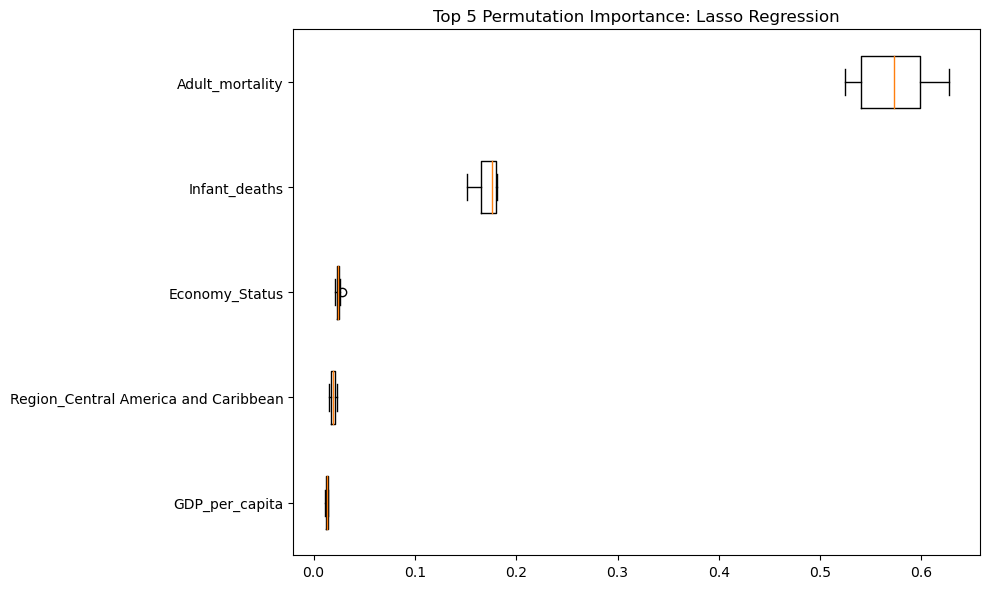

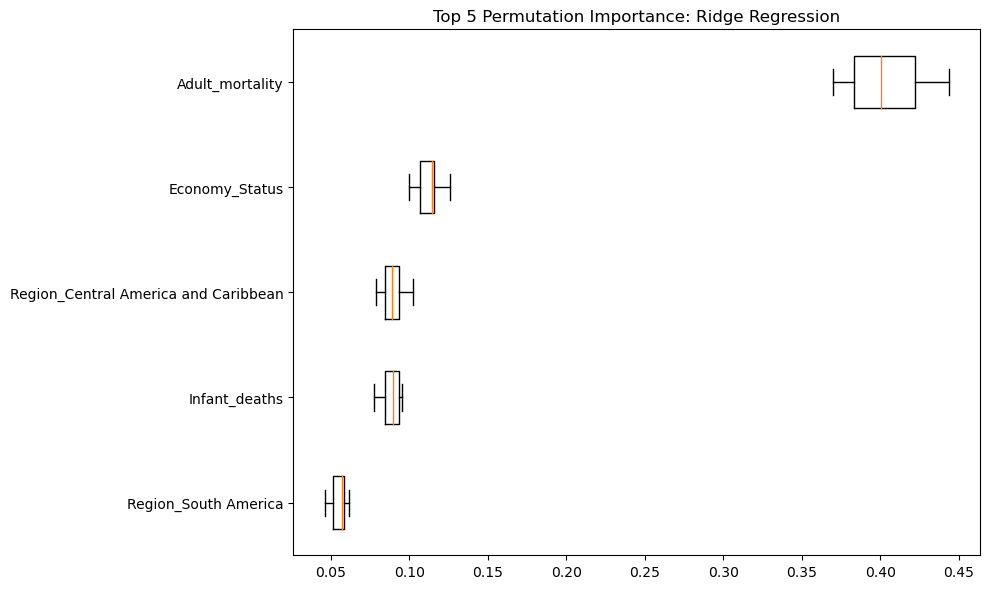

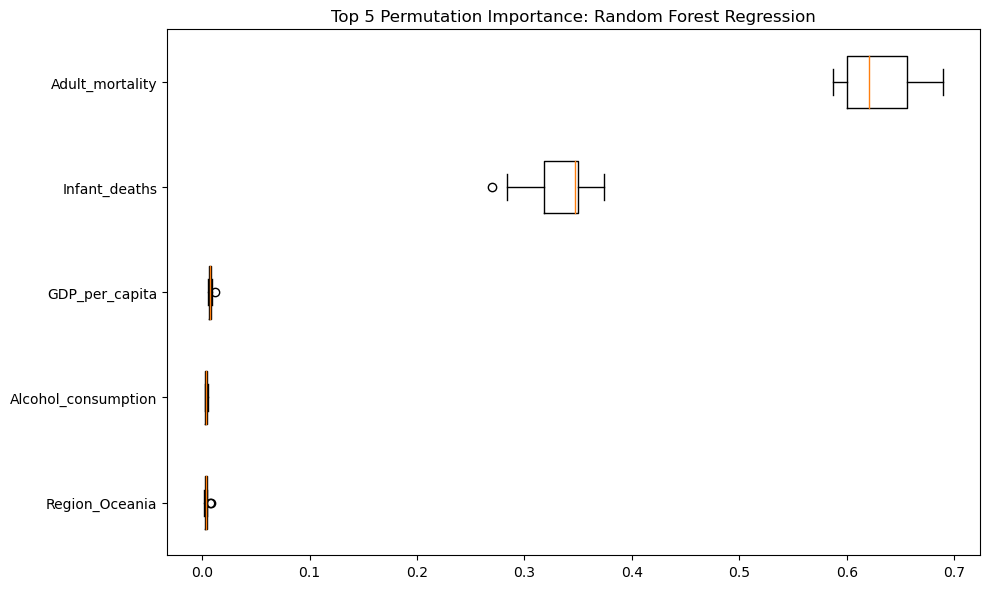

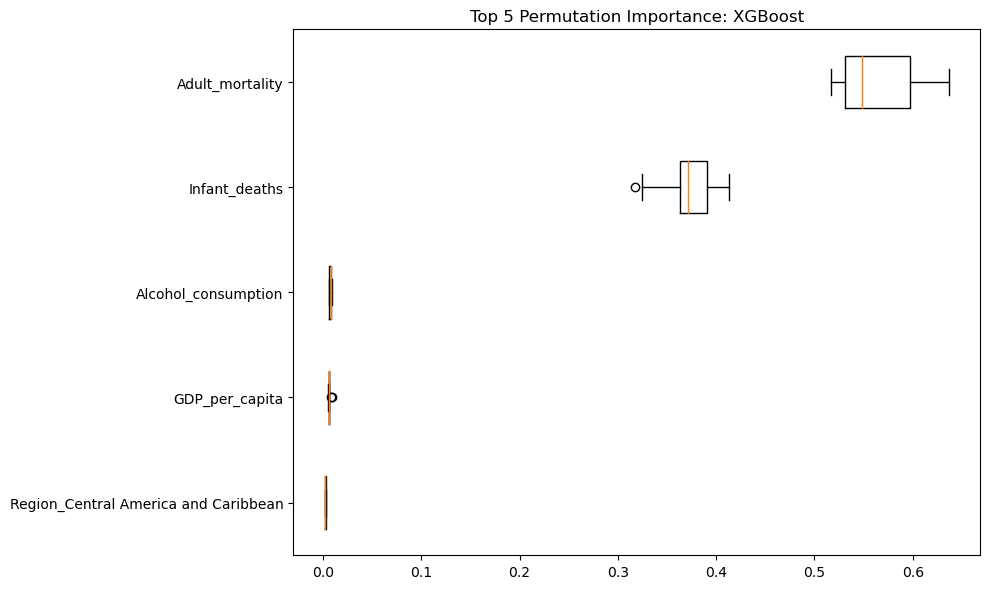

In [53]:
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt

def plot_top_5_permutation_importance(model, X, y, feature_names, title, file_name):
    result = permutation_importance(model, X, y, n_repeats=10, random_state=42, n_jobs=-1)
    sorted_idx = result.importances_mean.argsort()[-5:] 

    fig, ax = plt.subplots(figsize=(10, 6))
    ax.boxplot(result.importances[sorted_idx].T, vert=False, labels=feature_names[sorted_idx])
    ax.set_title(f'Top 5 Permutation Importance: {title}')
    plt.tight_layout()

    fig.savefig(file_name, dpi=300)

    plt.show()
    plt.close(fig)


plot_top_5_permutation_importance(best_model_lasso, X_test, y_test, X_test.columns, 'Lasso Regression', 'lasso_perm_importance.png')

plot_top_5_permutation_importance(best_model_ridge, X_test, y_test, X_test.columns, 'Ridge Regression', 'ridge_perm_importance.png')

plot_top_5_permutation_importance(best_model_rf, X_test, y_test, X_test.columns, 'Random Forest Regression', 'rf_perm_importance.png')

plot_top_5_permutation_importance(best_model_xgb, X_test, y_test, X_test.columns, 'XGBoost', 'xgb_perm_importance.png')

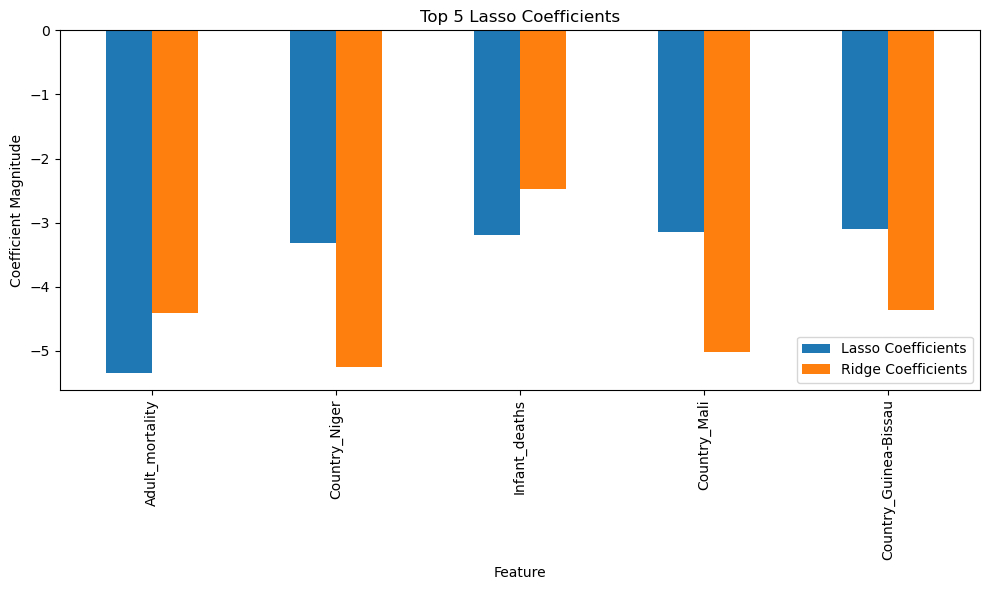

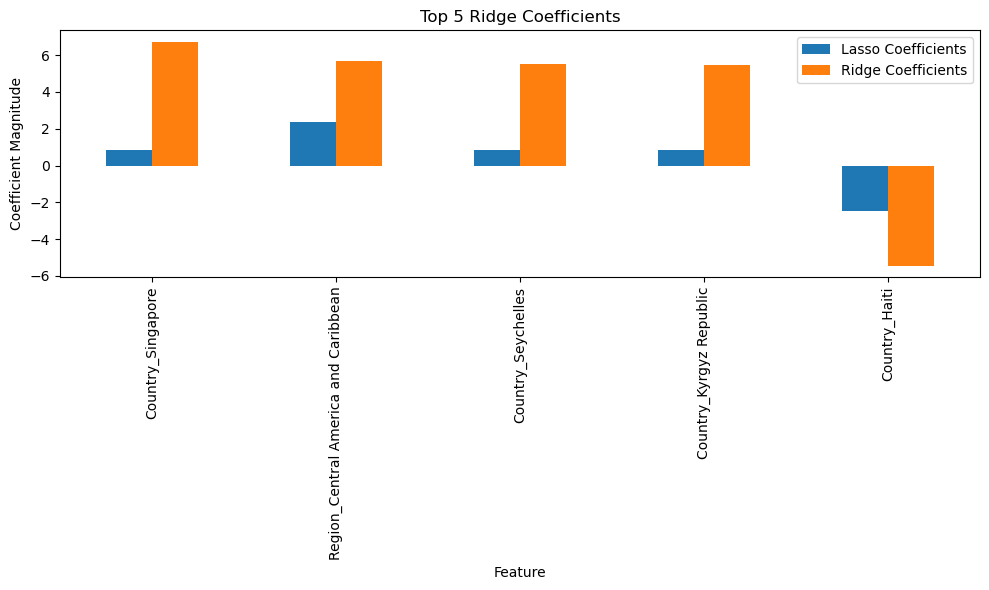

In [60]:
coefs_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Lasso Coefficients': lasso_coefs,
    'Ridge Coefficients': ridge_coefs
})

top_lasso_coefs = coefs_df.reindex(coefs_df['Lasso Coefficients'].abs().sort_values(ascending=False).index).head(5)
top_ridge_coefs = coefs_df.reindex(coefs_df['Ridge Coefficients'].abs().sort_values(ascending=False).index).head(5)

def plot_coefficients(df, title, filename):
    df = df.set_index('Feature')
    df.plot(kind='bar', figsize=(10, 6))
    plt.title(title)
    plt.ylabel('Coefficient Magnitude')
    plt.tight_layout()
    plt.savefig(filename, dpi=300)
    plt.show()

plot_coefficients(top_lasso_coefs, 'Top 5 Lasso Coefficients', 'top_5_lasso_coefficients.png')

plot_coefficients(top_ridge_coefs, 'Top 5 Ridge Coefficients', 'top_5_ridge_coefficients.png')

<Figure size 1000x600 with 0 Axes>

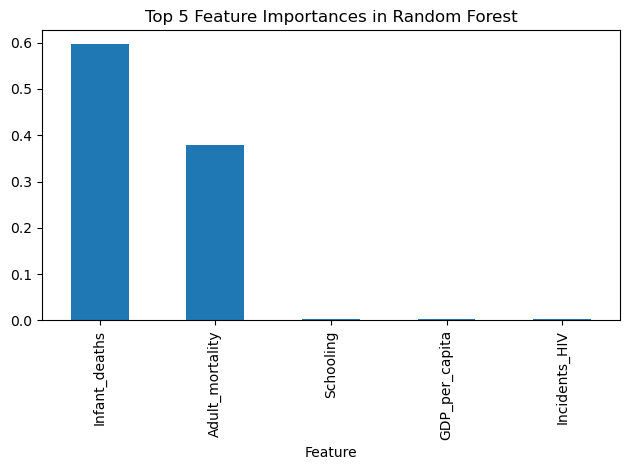

In [68]:
rf_feature_importances = best_rf.feature_importances_

feature_importances_rf_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': rf_feature_importances
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
feature_importances_rf_df.head(5).plot(kind='bar', x='Feature', y='Importance', legend=False)
plt.title('Top 5 Feature Importances in Random Forest')
plt.tight_layout()
plt.savefig('rf_top5_feature_importances.png')
plt.show()


<Figure size 1000x600 with 0 Axes>

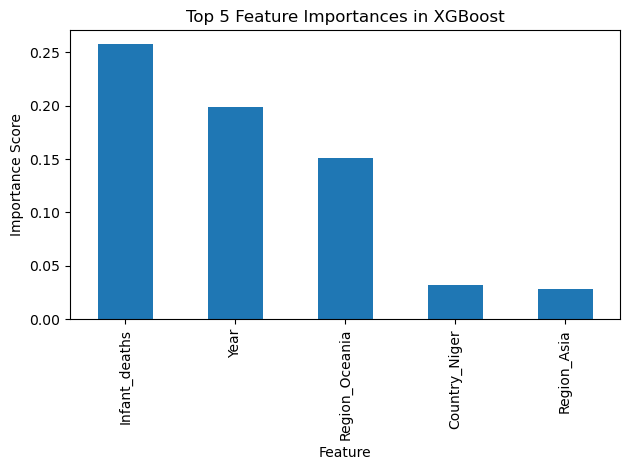

In [71]:
xgb_model = best_model_xgb.named_steps['ML_algo']

xgb_feature_importances = xgb_model.feature_importances_

features = X_train.columns

feature_importances_xgb_df = pd.DataFrame({
    'Feature': features,
    'Importance': xgb_feature_importances
})

feature_importances_xgb_df.sort_values(by='Importance', ascending=False, inplace=True)

plt.figure(figsize=(10, 6))
feature_importances_xgb_df.head(5).set_index('Feature').plot(kind='bar', legend=False)
plt.title('Top 5 Feature Importances in XGBoost')
plt.ylabel('Importance Score')
plt.tight_layout()
plt.savefig('xgb_top5_feature_importances.png')
plt.show()

Using 2148 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


<Figure size 640x480 with 0 Axes>

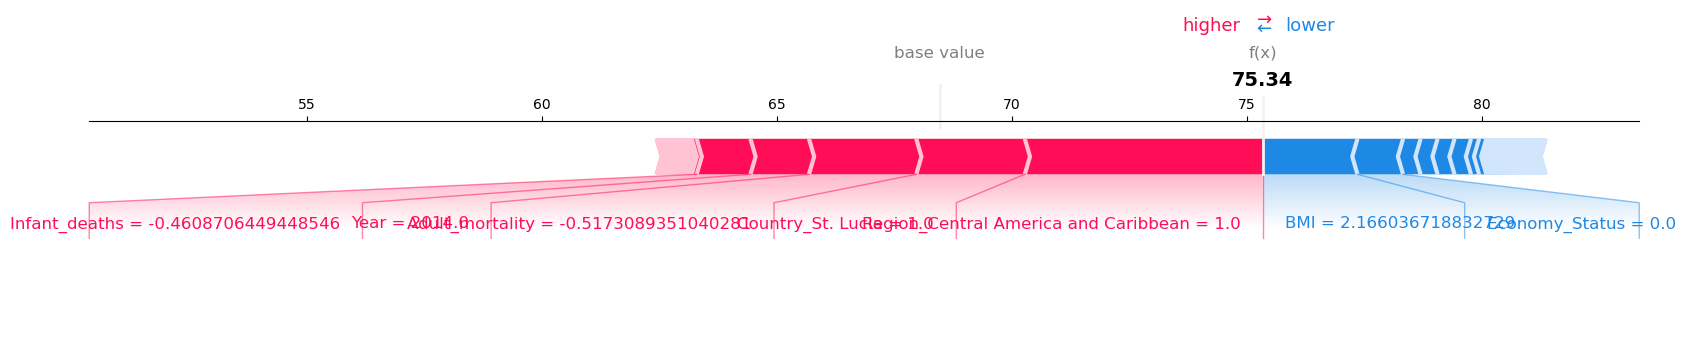

In [74]:
import shap
import matplotlib.pyplot as plt

explainer = shap.KernelExplainer(best_ridge.predict, X_train)

shap_values = explainer.shap_values(X_test.iloc[0, :])

shap.initjs()
force_plot = shap.force_plot(explainer.expected_value, shap_values, X_test.iloc[0, :], show=False)

shap.save_html('ridge_force_plot.html', force_plot)


shap.force_plot(explainer.expected_value, shap_values, X_test.iloc[0, :])

plt.figure()
shap.force_plot(explainer.expected_value, shap_values, X_test.iloc[0, :], matplotlib=True)
plt.savefig('ridge_force_plot.png')
plt.close()